In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [3]:
#load the dataset
data=pd.read_csv('/kaggle/input/suicide-watch/Suicide_Detection.csv')
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [4]:
#Size of the dataframe
data.shape

(232074, 3)

In [5]:
#Rename Unamed column

data = data.rename(columns={'Unnamed: 0':'ID'})

In [6]:
#Unique values in class
print(data['class'].unique())

['suicide' 'non-suicide']


In [7]:
# Create binary for class column
data['class_binary'] = data['class'].map({'suicide': 1, 'non-suicide': 0})

In [8]:
data.dropna()

,ID,text,class,class_binary
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
1,3,Am I weird I don't get affected by compliments...,non-suicide,0
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,0
3,8,i need helpjust help me im crying so hard,suicide,1
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1
...,...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide,0
232070,348106,You how you can tell i have so many friends an...,non-suicide,0
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide,0
232072,348108,The usual stuff you find hereI'm not posting t...,suicide,1


# Text Preprocessing

In [9]:
#nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    #remove urls
    text = re.sub(r'http\S+', '', text)
    #remove number and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    #remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text
    
data['processed_text'] = data['text'].apply(preprocess_text)



data.head()

,ID,text,class,class_binary,processed_text
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,1,ex wife threatening suiciderecently left wife ...
1,3,Am I weird I don't get affected by compliments...,non-suicide,0,weird dont get affected compliments coming som...
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,0,finally almost never hear bad year ever swear ...
3,8,i need helpjust help me im crying so hard,suicide,1,need helpjust help im crying hard
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1,im losthello name adam ive struggling years im...


# Feature Extraction

In [10]:
vectorizer = TfidfVectorizer(max_features = 5000) #Limiting to 5000 most frequent words for simplicity
X = vectorizer.fit_transform(data['processed_text'])
y = data['class']
z = data['class_binary'] #z_train, z_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build Model and Evaluate

In [11]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 non-suicide       0.94      0.86      0.90     23040
     suicide       0.87      0.94      0.91     23375

    accuracy                           0.90     46415
   macro avg       0.91      0.90      0.90     46415
weighted avg       0.91      0.90      0.90     46415



# Visualizations

## Confusion Matrix

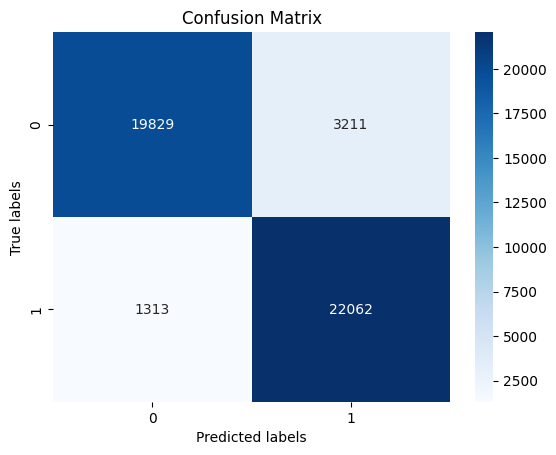

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test is your test dataset and y_pred is the predictions
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Class Distribution Bar Chart

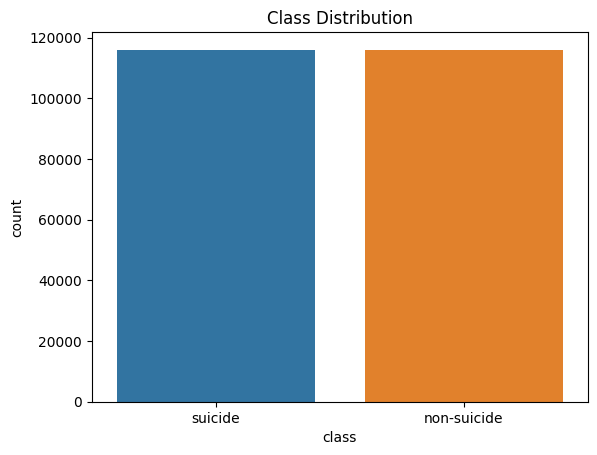

In [13]:
sns.countplot(data=data, x='class')
plt.title('Class Distribution')
plt.show()

## Word Cloud

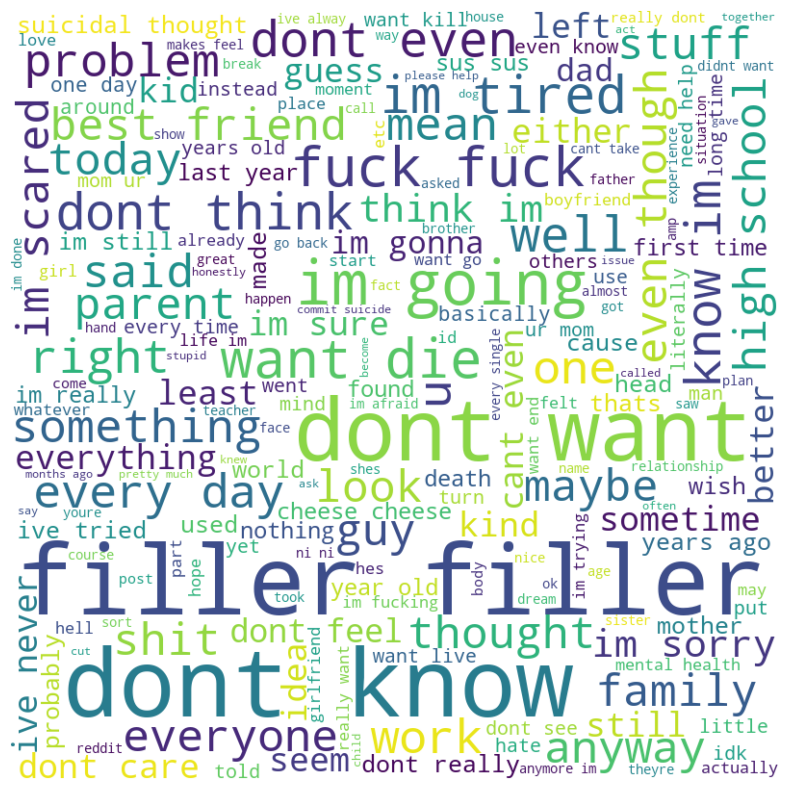

In [14]:
from wordcloud import WordCloud

all_text = ' '.join(data['processed_text'])
wordcloud = WordCloud(background_color='white', width=800, height=800).generate(all_text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature Extraction for ROC and Precision-Recall

In [15]:
vectorizer = TfidfVectorizer(max_features = 5000) #Limiting to 5000 most frequent words for simplicity
X = vectorizer.fit_transform(data['processed_text'])
y = data['class_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Precision-Recall Curve

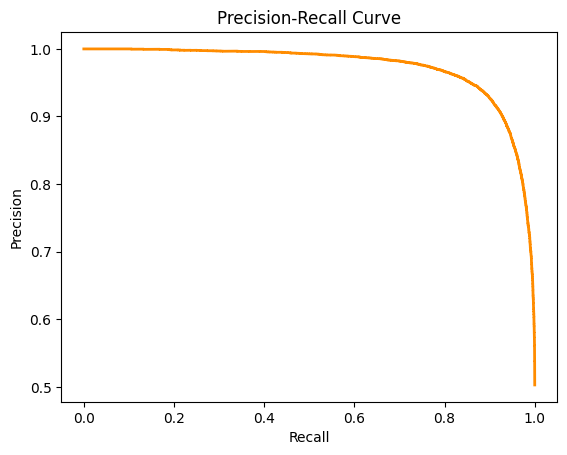

In [16]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## Roc Curve and AUC

### Roc Curve and AUC is a little stubborn on Kaggle
### Will try and output the curve on another platform.

In [ ]:

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()